In [1]:
import numpy as np
import pandas as pd
from glob import glob
import matplotlib.pyplot as plt

from get_data import *
from plotting import * 
from compute_returns import * 

def select_etfs(data, ETFs):
    sel_columns = ['Date']
    sel_columns.extend(ETFs)
    
    data_pruned = data[sel_columns].dropna(how="all",axis=0).copy()
    data_pruned.dropna(inplace=True)
    return data_pruned

#download_data_updated()
get_data_updated_2025(end_date = "2025-02")

In [2]:
data = pd.read_csv('Historical_data_updated_2025.csv')
list(data.columns[1:])

['S&P 500',
 'S&P 500 Minimum Volatility',
 'MSCI ACWI',
 'MSCI World',
 'MSCI Europe',
 'MSCI Emerging Markets',
 'MSCI USA Small Cap Value Weighted',
 'MSCI Europe Small Cap Value Weighted',
 'FTSE World Government Bond - Developed Markets']

In [32]:
portfolio = { 'MSCI ACWI'                                      : 70,
              'FTSE World Government Bond - Developed Markets' : 20,
              'MSCI USA Small Cap Value Weighted'              : 6,
              'MSCI Europe Small Cap Value Weighted'           : 4,
            }

years = 25  # Number of years for the rolling window

ETFs    = list(portfolio.keys())
weights = list(portfolio.values())

data_selected = select_etfs(data, ETFs)
data_selected

,Date,MSCI ACWI,FTSE World Government Bond - Developed Markets,MSCI USA Small Cap Value Weighted,MSCI Europe Small Cap Value Weighted
238,11/1994,18700.186326,18353.258081,10000.000000,10000.000000
239,12/1994,19149.219099,18232.979437,10405.099245,10301.931555
240,01/1995,18376.155360,18319.483364,10164.392843,10034.275420
241,02/1995,18369.127133,18451.247188,10499.145224,10025.372090
242,03/1995,18464.034250,18615.749694,10216.284938,9878.190237
...,...,...,...,...,...
597,10/2024,224200.191619,55534.603307,316888.372250,138375.774347
598,11/2024,239071.241238,57289.947892,358598.777743,140134.308148
599,12/2024,238077.880001,56892.306595,335259.040664,140723.907556
600,01/2025,245110.877561,56903.160327,347066.971161,147477.720585


/home/cavallo/Finance/src/plotting.py:7: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['Date'] = pd.to_datetime(data['Date'])


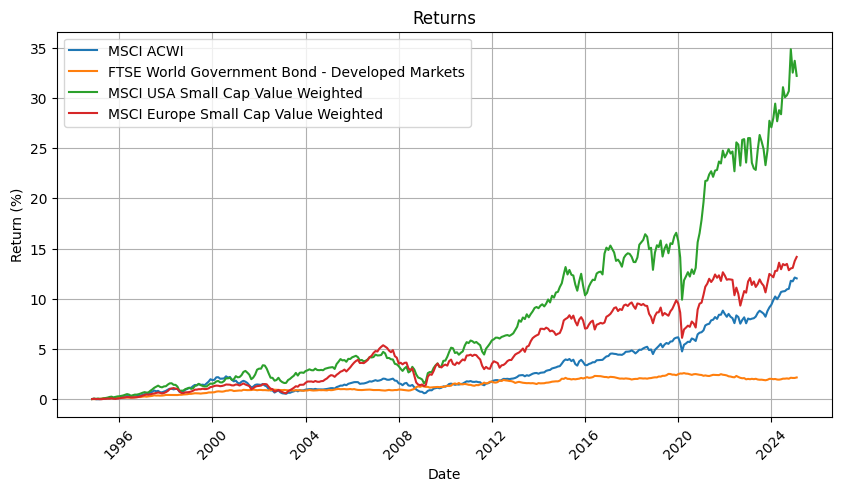

In [33]:
plot_percentage_returns(data_selected)

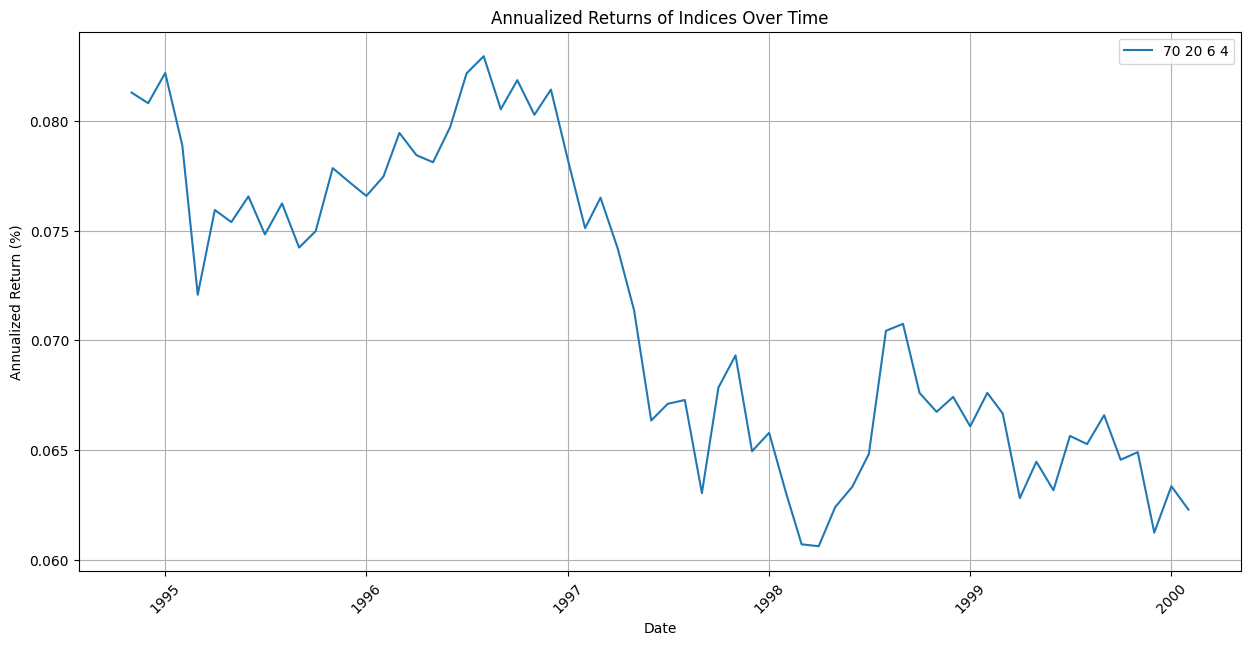

In [34]:
results = compute_portfolio_returns_combined(data_selected, weights, years=25)
plot_annualized_returns(results)

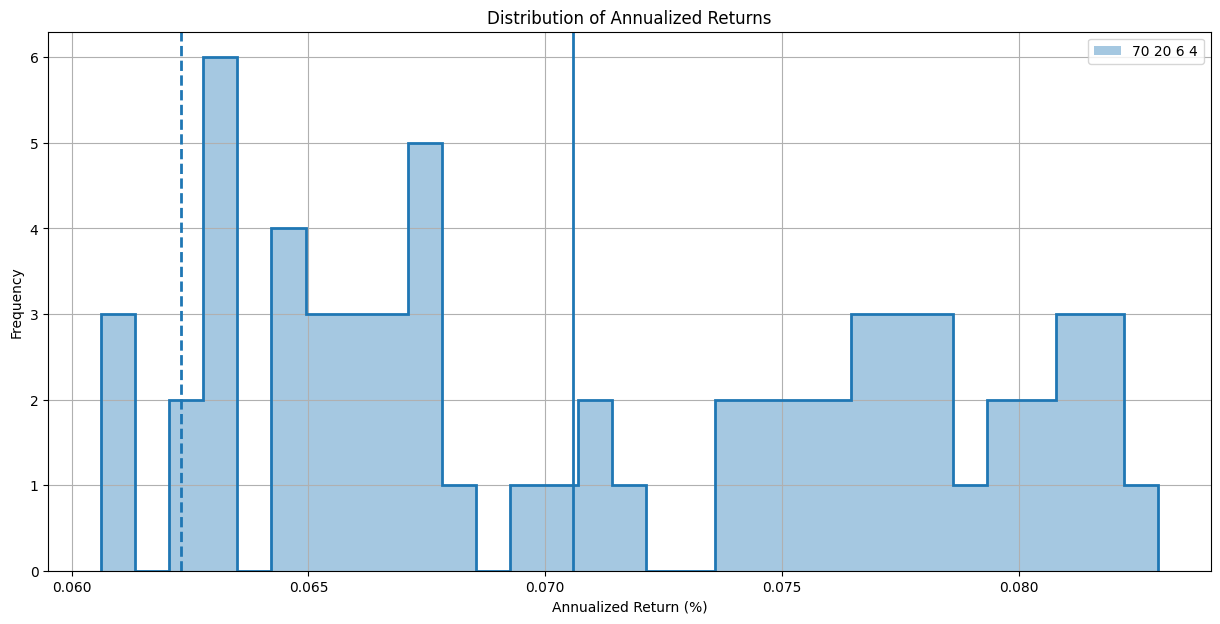

In [21]:
plot_returns_distributions(results)

In [26]:
data_selected = select_etfs(data, ETFs)
portfolio_pac = rolling_PAC(data_selected, weights, years=years, contribution=1000, TER=0.08)  # Compute rolling PAC

portfolio_pac

/home/cavallo/Finance/src/compute_returns.py:173: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df["Date"] = pd.to_datetime(df["Date"])  # Ensure Date is in datetime format


,Date,Portfolio Value,Invested Amount,Gain,Annualized Return
0,1994-11-01,8.023355e+05,300000,1.674452,0.040134
1,1994-12-01,8.264099e+05,300000,1.754700,0.041365
2,1995-01-01,8.299855e+05,300000,1.766618,0.041545
3,1995-02-01,8.261321e+05,300000,1.753774,0.041351
4,1995-03-01,7.657224e+05,300000,1.552408,0.038193
...,...,...,...,...,...
60,1999-11-01,9.768346e+05,300000,2.256115,0.048354
61,1999-12-01,1.040815e+06,300000,2.469385,0.051018
62,2000-01-01,1.026658e+06,300000,2.422195,0.050442
63,2000-02-01,1.052892e+06,300000,2.509639,0.051503


In [31]:
compute_PAC(data_selected, weights, contribution=1000, TER=0.0)

/home/cavallo/Finance/src/compute_returns.py:173: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df["Date"] = pd.to_datetime(df["Date"])  # Ensure Date is in datetime format
/home/cavallo/Finance/src/compute_returns.py:173: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df["Date"] = pd.to_datetime(df["Date"])  # Ensure Date is in datetime format


,Date,70 20 6 4,Months Elapsed,Units,Accumulated Units,Invested Amount,Portfolio Value
238,1994-11-01,17760.782045,0,0.056304,0.056304,1000,1.000000e+03
239,1994-12-01,18087.432474,1,0.055287,0.111591,2000,2.018392e+03
240,1995-01-01,17538.440012,2,0.057018,0.168608,3000,2.957129e+03
241,1995-02-01,17579.602028,3,0.056884,0.225493,4000,3.964069e+03
242,1995-03-01,17656.078619,4,0.056638,0.282130,5000,4.981314e+03
...,...,...,...,...,...,...,...
597,2024-10-01,192595.388103,359,0.005192,7.490715,360000,1.442677e+06
598,2024-11-01,205929.157435,360,0.004856,7.495571,361000,1.543557e+06
599,2024-12-01,203777.476061,361,0.004907,7.500478,362000,1.528428e+06
600,2025-01-01,209681.373451,362,0.004769,7.505247,363000,1.573711e+06


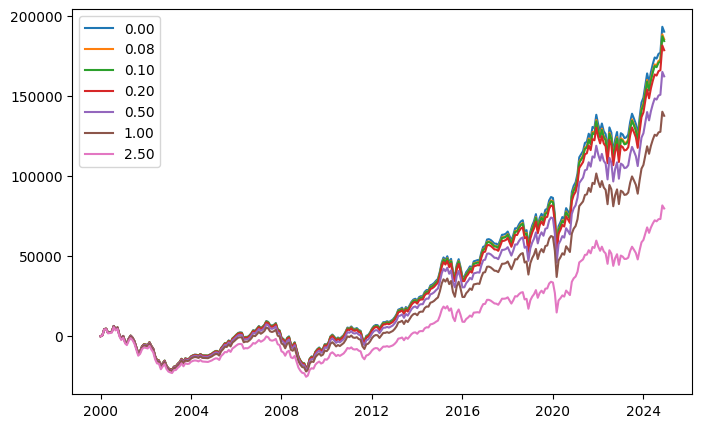

In [17]:
fig = plt.figure(figsize=(8,5))

df_TER = pd.DataFrame()

for i in [0,0.08, 0.1, 0.2, 0.5, 1, 2.5]:
    data_selected["Date"] = pd.to_datetime(data_selected["Date"], format="%m/%Y")
    w = data_selected['Date']>=pd.to_datetime('2000-01-01')


    label = '%1.2f' % i

    df = portfolio_prices(data_selected[w], weights, TER=i)
    df = df[df.columns[:-1]]

    dates = df['Date']
    df = df[df.columns[1]]
    df = df.subtract(df.iloc[0])   


    df_TER['Date'] = dates
    df_TER[label] = df

    plt.plot(dates, df, label=label)

plt.legend()

^C


In [27]:
ETFs = ['MSCI ACWI',
        'FTSE World Government Bond - Developed Markets',
        ]

data_selected = select_etfs(data, ETFs)
data_selected

,Date,MSCI ACWI,FTSE World Government Bond - Developed Markets
155,12/1987,10000.000000,9862.523187
156,01/1988,10362.212140,10484.893634
157,02/1988,11282.110059,10616.775861
158,03/1988,11476.420853,10553.932983
159,04/1988,11556.986830,10612.661325
...,...,...,...
597,10/2024,224200.191619,55534.603307
598,11/2024,239071.241238,57289.947892
599,12/2024,238077.880001,56892.306595
600,01/2025,245110.877561,56903.160327


/home/cavallo/Finance/src/plotting.py:7: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['Date'] = pd.to_datetime(data['Date'])


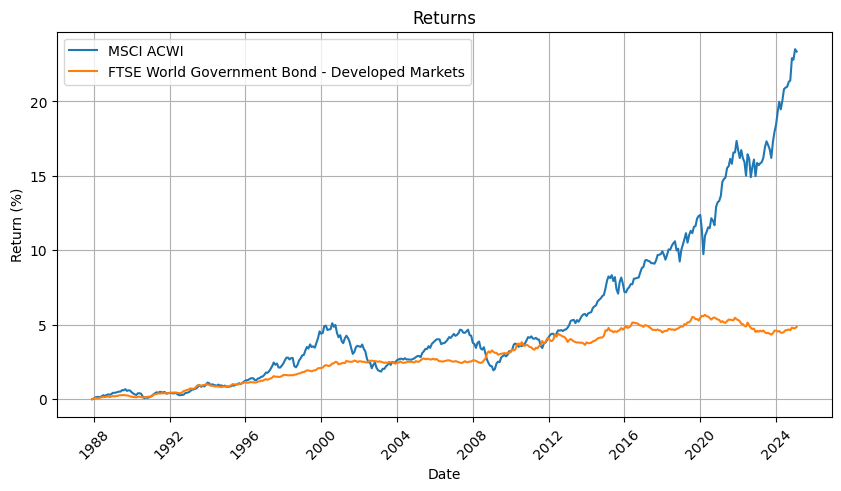

In [28]:
plot_percentage_returns(data_selected)

In [29]:
porfolios = [
                [100,0],
                [80,20],
                [60,40],
                [40,60],
                [20,80],
]

results = compute_portfolio_returns_combined(data_selected, porfolios, years=20)

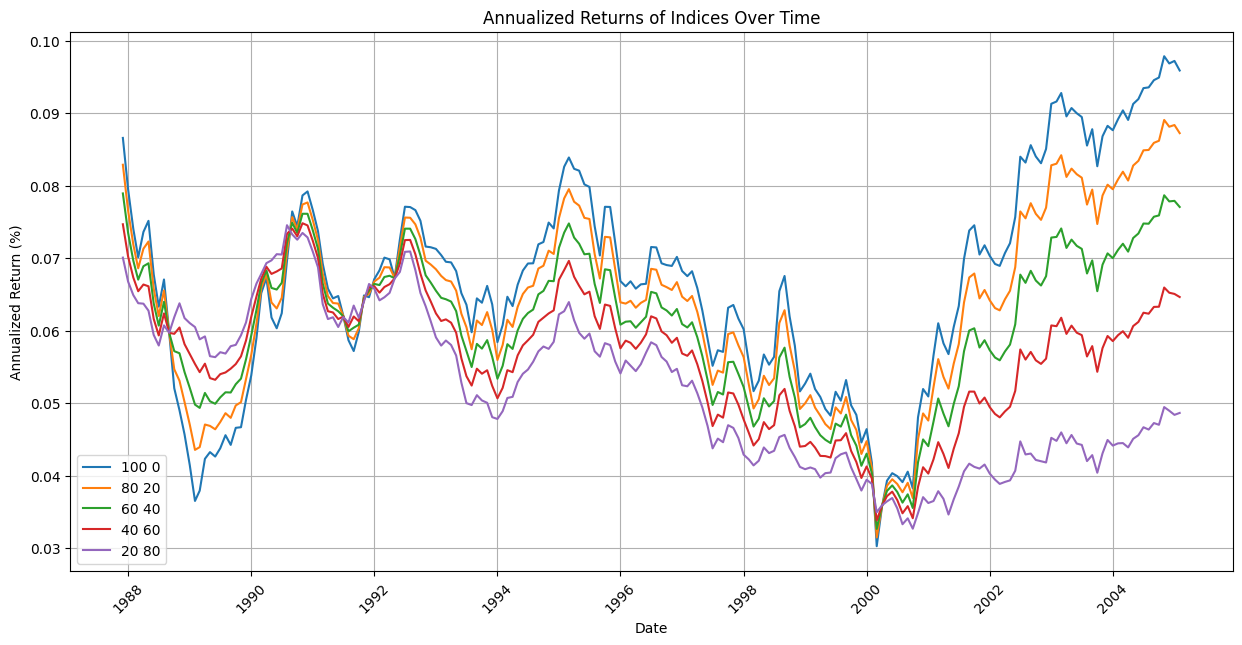

In [30]:
df = pd.DataFrame(results)

# Set Date as index
df["Date"] = pd.to_datetime(df["Date"])
df.set_index("Date", inplace=True)

# Plot
plt.figure(figsize=(15, 7))
for col in df.columns:
    plt.plot(df.index, df[col], label=col)

plt.xlabel("Date")
plt.ylabel("Annualized Return (%)")
plt.title("Annualized Returns of Indices Over Time")
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

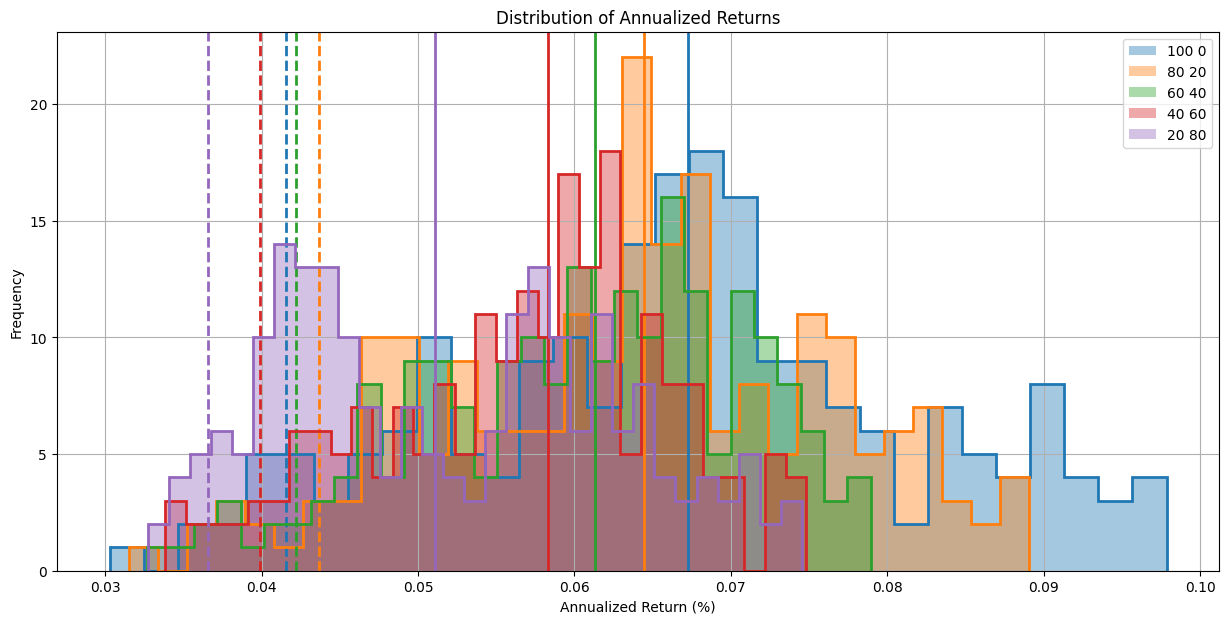

In [31]:
plot_returns_distributions(results)

In [32]:
# Example Usage:
weights = [80, 20]  # Example weights
years = 30  # Number of years for the rolling window
portfolio_df = rolling_PAC(data_selected, weights, years=years, contribution=1000)  # Compute rolling PAC
portfolio_df

,Date,Portfolio Value,Invested Amount,Gain,Annualized Return
0,1987-12-01,1.216244e+06,360000,2.378455,0.041415
1,1988-01-01,1.211280e+06,360000,2.364667,0.041273
2,1988-02-01,1.218454e+06,360000,2.384595,0.041478
3,1988-03-01,1.188266e+06,360000,2.300738,0.040608
4,1988-04-01,1.150966e+06,360000,2.197129,0.039502
...,...,...,...,...,...
83,1994-11-01,1.405359e+06,360000,2.903774,0.046444
84,1994-12-01,1.485849e+06,360000,3.127359,0.048389
85,1995-01-01,1.469799e+06,360000,3.082775,0.048009
86,1995-02-01,1.500489e+06,360000,3.168025,0.048732


In [33]:
data_selected = select_etfs(data, ETFs)
portfolio_pac = rolling_PAC(data_selected, weights, years=10, contribution=1000)  # Compute rolling PAC

portfolio_pac

/home/cavallo/Finance/src/compute_returns.py:173: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df["Date"] = pd.to_datetime(df["Date"])  # Ensure Date is in datetime format


,Date,Portfolio Value,Invested Amount,Gain,Annualized Return
0,1987-12-01,222941.447603,120000,0.857845,0.063900
1,1988-01-01,229013.533158,120000,0.908446,0.066763
2,1988-02-01,236726.181503,120000,0.972718,0.070302
3,1988-03-01,247793.679618,120000,1.064947,0.075204
4,1988-04-01,255525.212682,120000,1.129377,0.078513
...,...,...,...,...,...
323,2014-11-01,206210.898155,120000,0.718424,0.055633
324,2014-12-01,217716.756815,120000,0.814306,0.061380
325,2015-01-01,215064.949614,120000,0.792208,0.060080
326,2015-02-01,219429.107828,120000,0.828576,0.062212


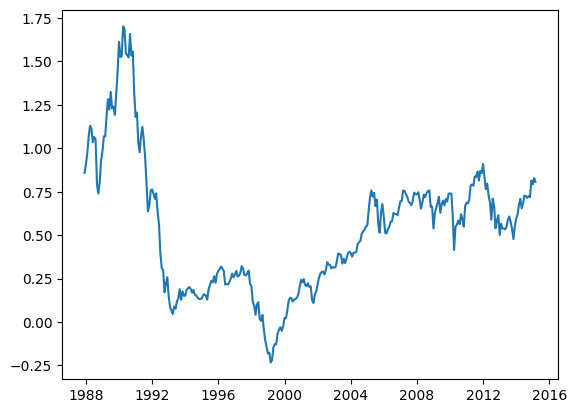

In [34]:
plt.plot(portfolio_pac['Date'], portfolio_pac['Gain'])

/home/cavallo/Finance/src/plotting.py:7: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['Date'] = pd.to_datetime(data['Date'])


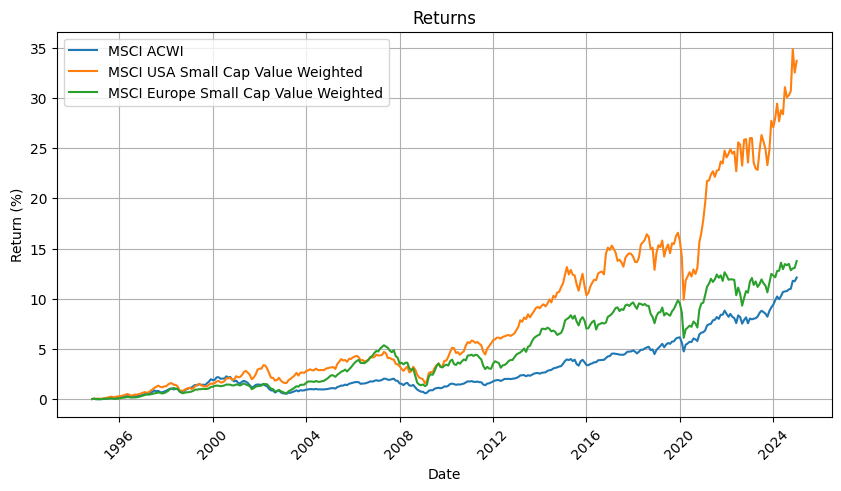

In [10]:
plot_percentage_returns(data_selected)

In [27]:
porfolios = [
               [100,0,0],
               [90,5,5],
               [80,10,10],
]

results = compute_portfolio_returns_multi(data_selected, porfolios, years=20)

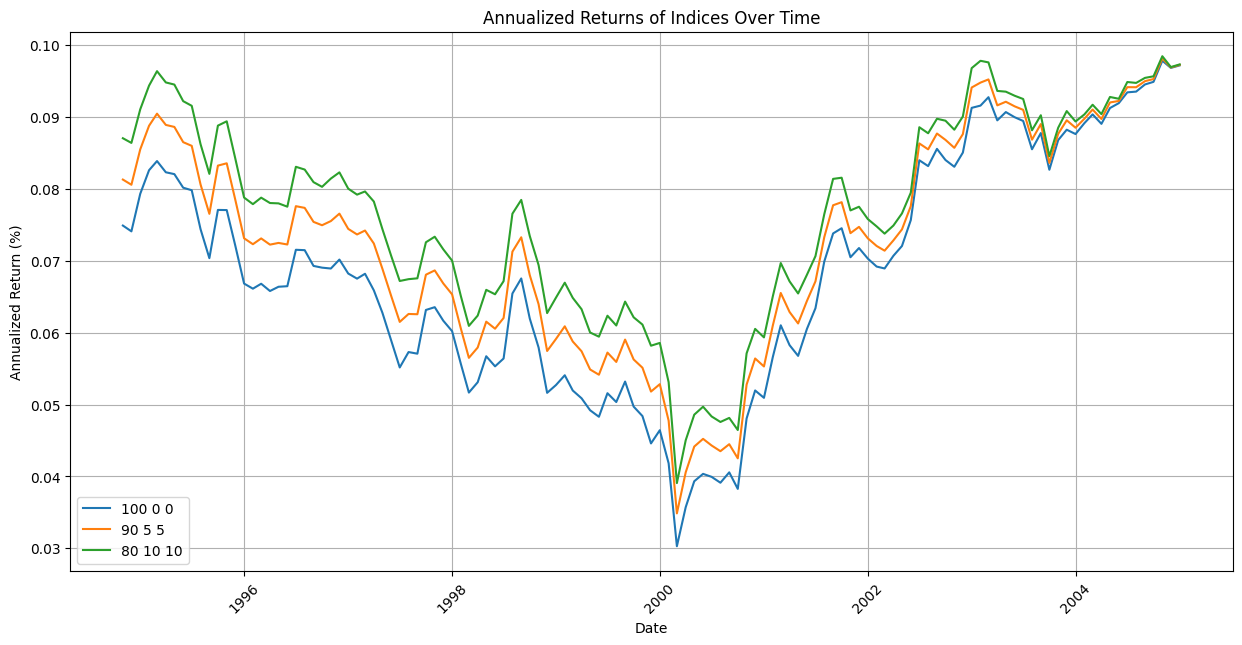

In [28]:
df = pd.DataFrame(results)

# Set Date as index
df["Date"] = pd.to_datetime(df["Date"])
df.set_index("Date", inplace=True)

# Plot
plt.figure(figsize=(15, 7))
for col in df.columns:
    plt.plot(df.index, df[col], label=col)

plt.xlabel("Date")
plt.ylabel("Annualized Return (%)")
plt.title("Annualized Returns of Indices Over Time")
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

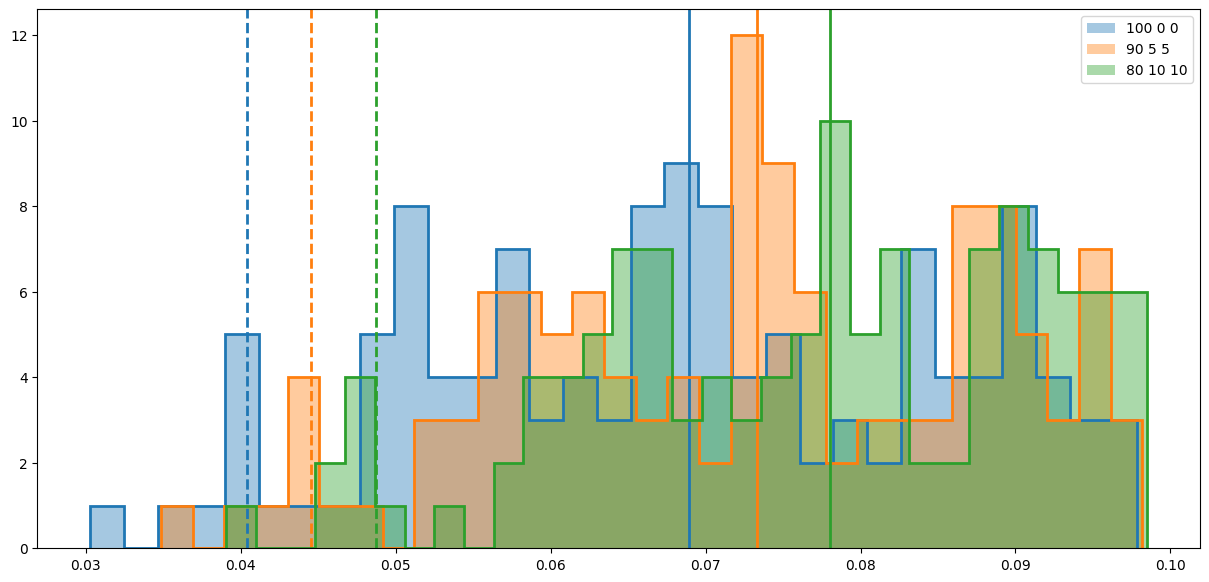

In [30]:
colors = ['C0', 'C1', 'C2', 'C3', 'C4', 'C5', 'C6',]
df = pd.DataFrame(results)

# Set Date as index
df["Date"] = pd.to_datetime(df["Date"])
df.set_index("Date", inplace=True)

# Plot
plt.figure(figsize=(15, 7))
for i,col in enumerate(df.columns):
    plt.hist(df[col], label=col, bins=31         , color=colors[i], alpha=0.4)
    plt.hist(df[col],            bins=31         , color=colors[i], histtype='step', lw=2)
    plt.axvline(np.percentile(df[col].values, 5) , color=colors[i], ls='--', lw=2)
    plt.axvline(np.percentile(df[col].values, 50), color=colors[i], ls='-' , lw=2)
plt.legend()

np.float64(0.002223181238364914)